In [1]:
import math
import os
import random as rand
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [2]:
import os
try:
    import pydot
except ModuleNotFoundError:
    os.system('conda install -c conda-forge pydot -y')

## Import data from data directory

In [3]:
overall_lake_depth_data = pd.read_csv('load_dataset/LakeDepth/pts_merged_final.csv')
overall_lake_depth_data.head(5)

,FID,Depth_m,Date,b1_LC8_075,b2_LC8_075,b3_LC8_075,b4_LC8_075,b5_LC8_075,b6_LC8_075,b7_LC8_075,...,b26_LC8_07,b27_LC8_07,b28_LC8_07,b29_LC8_07,b30_LC8_07,b31_LC8_07,b32_LC8_07,b33_LC8_07,b34_LC8_07,b35_LC8_07
0,0,0.630000,7/22/2017 0:00,164,271,199,42,27,16,605,...,2625,165,100,136,643,98,59,80,381,593
1,1,0.672727,7/22/2017 0:00,165,272,196,44,29,16,607,...,2750,176,107,148,659,97,59,82,364,552
2,2,0.670588,7/22/2017 0:00,154,260,193,40,32,19,592,...,2105,208,123,166,800,123,73,98,475,594
3,3,0.822222,7/22/2017 0:00,156,250,195,48,40,26,624,...,1846,256,160,205,833,167,104,133,542,650
4,4,1.725000,7/22/2017 0:00,117,164,78,38,23,17,713,...,2235,197,140,295,605,145,104,218,447,739


Drop the FID and Data from the csv

In [4]:
overall_lake_depth_nd = overall_lake_depth_data.drop(['FID', 'Date'], axis=1)
overall_lake_depth_nd.head(5)

,Depth_m,b1_LC8_075,b2_LC8_075,b3_LC8_075,b4_LC8_075,b5_LC8_075,b6_LC8_075,b7_LC8_075,b8_LC8_075,b9_LC8_075,...,b26_LC8_07,b27_LC8_07,b28_LC8_07,b29_LC8_07,b30_LC8_07,b31_LC8_07,b32_LC8_07,b33_LC8_07,b34_LC8_07,b35_LC8_07
0,0.630000,164,271,199,42,27,16,605,824,3905,...,2625,165,100,136,643,98,59,80,381,593
1,0.672727,165,272,196,44,29,16,607,842,3750,...,2750,176,107,148,659,97,59,82,364,552
2,0.670588,154,260,193,40,32,19,592,798,3850,...,2105,208,123,166,800,123,73,98,475,594
3,0.822222,156,250,195,48,40,26,624,800,3250,...,1846,256,160,205,833,167,104,133,542,650
4,1.725000,117,164,78,38,23,17,713,1500,3079,...,2235,197,140,295,605,145,104,218,447,739


# Describe statistics to report anamolous data
Look for anything weird

In [5]:
overall_lake_depth_nd.describe()

,Depth_m,b1_LC8_075,b2_LC8_075,b3_LC8_075,b4_LC8_075,b5_LC8_075,b6_LC8_075,b7_LC8_075,b8_LC8_075,b9_LC8_075,...,b26_LC8_07,b27_LC8_07,b28_LC8_07,b29_LC8_07,b30_LC8_07,b31_LC8_07,b32_LC8_07,b33_LC8_07,b34_LC8_07,b35_LC8_07
count,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,...,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000,23177.000000
mean,2.221400,424.288001,553.758079,427.147301,312.433188,175.490055,132.437373,558.585451,922.828753,1900.034603,...,4054.567977,473.428356,410.961686,544.808215,685.495103,332.496527,303.484877,394.607499,499.365880,768.926047
std,1.872953,755.932158,731.549284,630.296958,479.544589,309.819959,244.022402,402.546098,2850.095960,3253.968664,...,6661.986500,2223.950009,539.947680,2837.452024,879.992656,1868.261448,395.559938,2580.861184,801.365571,455.468874
min,0.250000,-151.000000,47.000000,-39.000000,-38.000000,-3.000000,-9.000000,-3213.000000,-32768.000000,-32768.000000,...,-32768.000000,-32768.000000,-8.000000,-32768.000000,-32000.000000,-32768.000000,-22.000000,-32768.000000,-31000.000000,-9667.000000
25%,1.405170,128.000000,235.000000,116.000000,52.000000,29.000000,20.000000,429.000000,607.000000,753.000000,...,1413.000000,126.000000,88.000000,130.000000,391.000000,87.000000,63.000000,94.000000,265.000000,651.000000
50%,1.870750,189.000000,324.000000,224.000000,118.000000,51.000000,37.000000,621.000000,933.000000,1626.000000,...,2126.000000,246.000000,155.000000,271.000000,661.000000,173.000000,105.000000,189.000000,453.000000,734.000000
75%,2.348770,262.000000,441.000000,379.000000,337.000000,164.000000,120.000000,789.000000,1241.000000,3294.000000,...,3500.000000,643.000000,588.000000,843.000000,895.000000,458.000000,460.000000,620.000000,679.000000,828.000000
max,21.037500,5277.000000,5442.000000,4984.000000,5370.000000,2879.000000,2568.000000,4171.000000,32767.000000,32767.000000,...,32767.000000,32767.000000,4128.000000,32767.000000,32767.000000,32767.000000,2771.000000,32767.000000,32767.000000,32767.000000


Let's convert the data in nparrays just for sklearn's sake
(We won't do this in the RAPIDS env due to us having cuDF)

In [7]:
labels = overall_lake_depth_nd['Depth_m']
covariate_spectral_bands = overall_lake_depth_nd.drop(['Depth_m'], axis=1)
spectral_bands_list = list(covariate_spectral_bands.columns)
#covariate_spectral_bands = np.array(covariate_spectral_bands)

# Train - test splitting

In [8]:
covariates_train, covariates_test, labels_train, labels_test = train_test_split(covariate_spectral_bands,
                                                                               labels, test_size = 0.2,
                                                                               random_state = 42)

print('Training features shapes:', covariates_train.shape)
print('Testing features shapes:', covariates_test.shape)
print('Training labels shapes:', labels_train.shape)
print('Testing labels shapes:', labels_test.shape)

# Training

In [9]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)

In [10]:
%%time
rf_model.fit(covariates_train, labels_train)

CPU times: user 8min 7s, sys: 759 ms, total: 8min 7s
Wall time: 8min 7s


RandomForestRegressor(n_estimators=1000, random_state=42)

# Predictions

In [11]:
%%time
predictions = rf_model.predict(covariates_test)
errors = abs(predictions - labels_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'meters.')

Mean Absolute Error: 0.41 meters.
CPU times: user 1.49 s, sys: 194 ms, total: 1.68 s
Wall time: 1.67 s


Calculate mean absolute percentage error (MAPE)

In [12]:
mape = 100 * (errors / labels_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy,2),'%.')

Accuracy: 78.59 %.


## Train on bands 1-6

In [15]:
adjusted_cols_idx = covariate_spectral_bands.columns[:6]
covariate_spectral_bands_adjusted = covariate_spectral_bands[adjusted_cols_idx]
cv_one_six_train, cv_one_six_test, l_one_six_train, l_one_six_test = train_test_split(covariate_spectral_bands_adjusted,
                                                                                      labels, 
                                                                                      test_size = 0.2,
                                                                                      shuffle=True,
                                                                                      random_state = 42)
spectral_bands_list = list(covariate_spectral_bands_adjusted.columns)
print(spectral_bands_list)
cv_one_six_train.head(5)

['b1_LC8_075', 'b2_LC8_075', 'b3_LC8_075', 'b4_LC8_075', 'b5_LC8_075', 'b6_LC8_075']


,b1_LC8_075,b2_LC8_075,b3_LC8_075,b4_LC8_075,b5_LC8_075,b6_LC8_075
8678,236,428,488,1665,1523,869
12893,83,190,82,29,30,25
22839,-9,179,100,349,235,190
4877,161,251,74,47,31,19
19022,212,297,205,71,35,23


In [16]:
%%time

rf_one_six_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_one_six_model.fit(cv_one_six_train, l_one_six_train)


CPU times: user 1min 12s, sys: 601 ms, total: 1min 12s
Wall time: 1min 12s


RandomForestRegressor(n_estimators=1000, random_state=42)

In [17]:
preds_one_six = rf_one_six_model.predict(cv_one_six_test)
mae_score = mean_absolute_error(l_one_six_test, preds_one_six)
r2 = r2_score(l_one_six_test, preds_one_six)
print("MAE: ", mae_score)
print("r^2: ", r2)

MAE:  0.42820041916003015
r^2:  0.7777936578812373


In [18]:
result = permutation_importance(rf_one_six_model, 
                                cv_one_six_train, 
                                l_one_six_train, 
                                n_repeats=5, 
                                random_state=42)

Variables: b3_LC8_075           Importance: 1.92171
Variables: b1_LC8_075           Importance: 1.68431
Variables: b4_LC8_075           Importance: 1.04489
Variables: b2_LC8_075           Importance: 0.48516
Variables: b5_LC8_075           Importance: 0.45505
Variables: b6_LC8_075           Importance: 0.17904


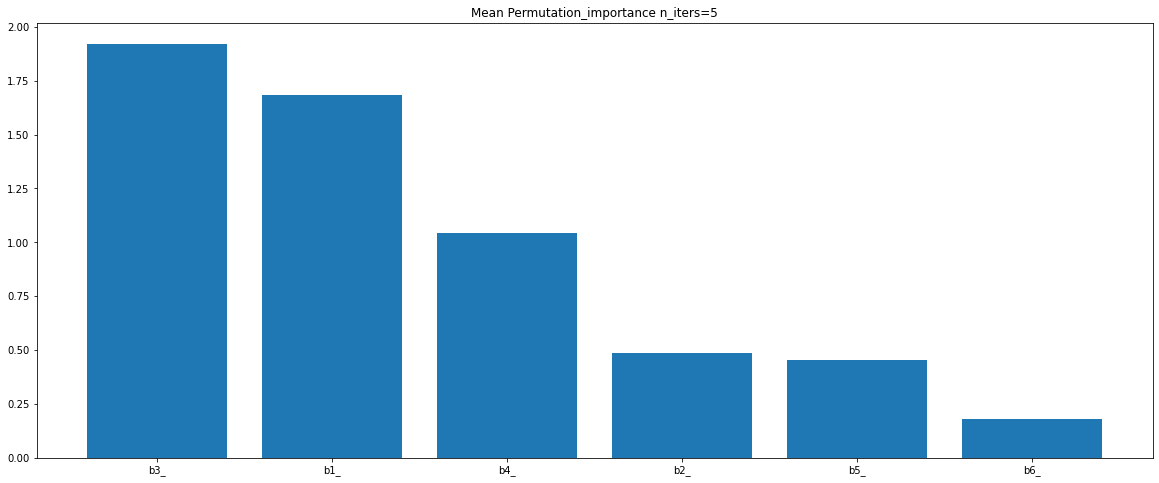

Importances_mean:  [1.68430603 0.48516472 1.92170922 1.04488831 0.45504982 0.17903567]
Importances_std:  [0.01990674 0.01168463 0.02990808 0.01656078 0.0056657  0.00213915]


In [20]:
cv_list = list(cv_one_six_train.columns)
importance = result.importances_mean
sorted_idx = result.importances_mean.argsort()
sorted_idx = np.flip(sorted_idx)
feature_importances = [(feature, (round(importance, 5))) for feature, importance in zip(cv_list, importance)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variables: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];
plt.figure(figsize=(20, 8))
plt.bar([x for x in range(len(importance))], importance[sorted_idx])

x_tick_list = cv_one_six_train.columns[sorted_idx]
x_tick_adjusted_length = []
for tick in x_tick_list:
    x_tick_adjusted_length.append(tick[:3])

plt.xticks(range(len(importance)), x_tick_adjusted_length)
plt.title("Mean Permutation_importance n_iters=5")
plt.show()
print("Importances_mean: ",result.importances_mean)
print("Importances_std: ",result.importances_std)

# Visualize a single decision tree
I think this is a really cool visual.

In [ ]:
# Retrain model for smaller graph
rf_small = RandomForestRegressor(n_estimators=10, max_depth=3)
rf_small.fit(covariates_train, labels_train)

# Variable Importances

In [14]:
# Get numerical importances
importances = list(rf_model.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for
                      feature, importance in zip(spectral_bands_list, importances)]

In [15]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [16]:
[print('Variables: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variables: b8_LC8_075           Importance: 0.14
Variables: b17_LC8_07           Importance: 0.08
Variables: b24_LC8_07           Importance: 0.08
Variables: b18_LC8_07           Importance: 0.07
Variables: b7_LC8_075           Importance: 0.06
Variables: b13_LC8_07           Importance: 0.05
Variables: b1_LC8_075           Importance: 0.04
Variables: b2_LC8_075           Importance: 0.03
Variables: b12_LC8_07           Importance: 0.03
Variables: b14_LC8_07           Importance: 0.03
Variables: b19_LC8_07           Importance: 0.03
Variables: b22_LC8_07           Importance: 0.03
Variables: b25_LC8_07           Importance: 0.03
Variables: b3_LC8_075           Importance: 0.02
Variables: b4_LC8_075           Importance: 0.02
Variables: b5_LC8_075           Importance: 0.02
Variables: b6_LC8_075           Importance: 0.02
Variables: b9_LC8_075           Importance: 0.02
Variables: b23_LC8_07           Importance: 0.02
Variables: b26_LC8_07           Importance: 0.02
Variables: b30_LC8_0

# Construct a new random forest w/ Importance

In [17]:
rf_most_important = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [18]:
important_indeces = [spectral_bands_list.index('b8_LC8_075'), spectral_bands_list.index('b17_LC8_07'),
                    spectral_bands_list.index('b24_LC8_07'), spectral_bands_list.index('b18_LC8_07'),
                    spectral_bands_list.index('b7_LC8_075'), spectral_bands_list.index('b13_LC8_07')]
train_important = covariates_train[:, important_indeces]
test_important = covariates_test[:, important_indeces]
print(train_important.shape)
print(test_important.shape)

(18541, 6)
(4636, 6)


In [20]:
%%time
rf_most_important.fit(train_important, labels_train)

CPU times: user 1min 26s, sys: 714 ms, total: 1min 27s
Wall time: 1min 27s


RandomForestRegressor(n_estimators=1000, random_state=42)

In [21]:
predictions = rf_most_important.predict(test_important)
errors = abs(predictions - labels_test)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'metres.')
mape = np.mean(100 * (errors / labels_test))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.53 metres.
Accuracy: 72.19 %.
